In [ ]:
!unzip '/content/drive/MyDrive/IDRID_MESSIDOR12.zip'

Archive:  /content/drive/MyDrive/IDRID_MESSIDOR12.zip
   creating: IDRID_MESSIDOR12/Dataset/
   creating: IDRID_MESSIDOR12/Dataset/TestSet/
   creating: IDRID_MESSIDOR12/Dataset/TestSet/1/
  inflating: IDRID_MESSIDOR12/Dataset/TestSet/1/20060530_36788_0100_PP.tif  
  inflating: IDRID_MESSIDOR12/Dataset/TestSet/1/20060530_53522_0100_PP.tif  
  inflating: IDRID_MESSIDOR12/Dataset/TestSet/1/20060530_53540_0100_PP.tif  
  inflating: IDRID_MESSIDOR12/Dataset/TestSet/1/20060530_54107_0100_PP.tif  
  inflating: IDRID_MESSIDOR12/Dataset/TestSet/1/20060530_54117_0100_PP.tif  
  inflating: IDRID_MESSIDOR12/Dataset/TestSet/1/20060530_54529_0100_PP.tif  
  inflating: IDRID_MESSIDOR12/Dataset/TestSet/1/20060530_54556_0100_PP.tif  
  inflating: IDRID_MESSIDOR12/Dataset/TestSet/1/20060530_55304_0100_PP.tif  
  inflating: IDRID_MESSIDOR12/Dataset/TestSet/1/20060530_55837_0100_PP.tif  
  inflating: IDRID_MESSIDOR12/Dataset/TestSet/1/IDRiD_002.jpg  
  inflating: IDRID_MESSIDOR12/Dataset/TestSet/1/IDRiD_

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Concatenate
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers, activations
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import cv2
import numpy as np
from numpy import std, mean, sqrt, max, min, exp
import os
import sklearn
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import BatchNormalization
print("Done Importing")

Done Importing


In [ ]:
import cv2
import numpy as np
from numpy import std, mean, sqrt, max, min, exp

def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
# Color Transormation
def ColorTransition(Simg, Timg):
    R, G, B=cv2.split(Simg)
    R = np.float64(R)
    G = np.float64(G)
    B = np.float64(B)
 
    R1, G1, B1=cv2.split(Timg)
    R1 = np.float64(R1)
    G1 = np.float64(G1)
    B1 = np.float64(B1)
 
    # conversion from RGB to lab color space -> Source Image
    L=0.3811*R+0.5783*G+0.0402*B
    M=0.1967*R+0.7244*G+0.0782*B
    S=0.0241*R+0.1288*G+0.8444*B
    L = np.float64(L)
    M = np.float64(M)
    S = np.float64(S)
 
    # conversion from RGB to lab color space -> Target Image
    L1=0.3811*R1+0.5783*G1+0.0402*B1;
    M1=0.1967*R1+0.7244*G1+0.0782*B1;
    S1=0.0241*R1+0.1288*G1+0.8444*B1;
    L1 = np.float64(L1)
    M1 = np.float64(M1)
    S1 = np.float64(S1)
 
    I2 = cv2.merge((L,M,S))
    A2 = cv2.merge((L1,M1,S1))
    
    l=0.5774*L+0.5774*M+0.5774*S;
    a=0.4082*L+0.4082*M-0.8165*S;
    b=0.7071*L-0.7071*M;
    l = np.float64(l)
    a = np.float64(a)
    b = np.float64(b)
 
    l1=0.5774*L1+0.5774*M1+0.5774*S1;
    a1=0.4082*L1+0.4082*M1-0.8165*S1;
    b1=0.7071*L1-0.7071*M1;
    l1 = np.float64(l1)
    a1 = np.float64(a1)
    b1 = np.float64(b1)
 
    I3 = cv2.merge((l,a,b))
    A3 = cv2.merge((l1,a1,b1))
 
    std1=std(l1)
    std2=std(l)
 
    std3=std(a1);
    std4=std(a);
    
    std5=std(b1);
    std6=std(b);
 
    p=(sqrt(mean(l1))-(sqrt(mean(l))))/(sqrt(mean(l1))+(sqrt(mean(l))))
    s=0
    if p>0:    
        s=0.9-(0.9 - 0.15)/(1+exp((p-0.45)/(0.05)))
    else:
        s=0.15

    l3=mean(mean(l1))+(l-mean(mean(l)))*(std1/std2)
    a3=mean(mean(a1))+(a-mean(mean(a)))*(std3/std4)
    b3=mean(mean(b1))+(b-mean(mean(b)))*(std5/std6)
    l3 = np.float64(l3)
    a3 = np.float64(a3)
    b3 = np.float64(b3)

    # Conversion from lab to RGB color space%
    L3=0.5774*l3+0.4082*a3+0.7071*b3
    M3=0.5774*l3+0.4082*a3-0.7071*b3
    S3=0.5774*l3-0.8169*a3
    L3 = np.float64(L3)
    M3 = np.float64(M3)
    S3 = np.float64(S3)
 
    R3=4.4679*L3-3.5873*M3+0.1193*S3
    G3=-1.2186*L3+2.3809*M3-0.1624*S3
    B3=0.0497*L3-0.2439*M3+1.2045*S3
 
    I7 = cv2.merge((R3,G3,B3))
    I7 = normalize(I7)
    return I7

def preProcessing(img):
    Target = cv2.imread('/content/drive/MyDrive/20051020_44782_0100_PP.tif')
    Target = cv2.cvtColor(Target, cv2.COLOR_BGR2RGB)
    Target = cv2.resize(Target, (750, 499))
    img = ColorTransition(img, Target)
    img = normalize(img)
    partA = -4 * cv2.GaussianBlur(img, (25,25), 0)
    partB = 4*img + 0.5
    result = partA + partB
    result = normalize(result)
    return result

In [ ]:
image_gen=ImageDataGenerator(
  zca_epsilon=1e-06,
  rotation_range=80,
  width_shift_range=2.0,
  height_shift_range=2.0,
  brightness_range=None,
  shear_range=0.2,
  zoom_range=0.3,
  channel_shift_range=0.0,
  fill_mode="nearest",
  cval=0.0,
  horizontal_flip=True,
  vertical_flip=True,
  rescale=2,
  preprocessing_function=preProcessing)

train=image_gen.flow_from_directory("/content/IDRID_MESSIDOR12/Dataset/TrainSet",
                                  target_size=(499, 750),
                                  batch_size=16,
                                  class_mode="categorical")


test=image_gen.flow_from_directory("/content/IDRID_MESSIDOR12/Dataset/TestSet",
                                  target_size=(499, 750),
                                  batch_size=8,
                                  class_mode="categorical")

ir2=InceptionV3(include_top=False, weights='imagenet',input_shape=(499, 750, 3))
print("Model Imported!")
output = ir2.layers[-1].output
output = keras.layers.Flatten()(output)
ir2_model = Model(ir2.input, output)
count=0

for layer in ir2_model.layers:
      if(count>200):
          break
      layer.trainable=False
      count+=1

model= Sequential()
model.add(ir2_model)

model.add(Dense(512, activation='relu',input_dim=ir2_model.output_shape[1]))

model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dropout(0.2))


model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Activation("relu"))

model.add(Dense(8))
model.add(Activation("relu"))

model.add(Dense(4))
model.add(Activation("relu"))

model.add(Dense(2, activation='softmax'))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

Found 444 images belonging to 2 classes.
Found 81 images belonging to 2 classes.
87924736/87910968 [==============================] - 2s 0us/step
Model Imported!


In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/efinc.h5",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
results=model.fit(train,epochs=100,validation_data=test, callbacks=[model_checkpoint_callback])

Epoch 1/100
30/30 [==============================] - 97s 2s/step - loss: 2.7295 - accuracy: 0.6638 - val_loss: 39.3154 - val_accuracy: 0.6486
Epoch 2/100
30/30 [==============================] - 66s 2s/step - loss: 0.5974 - accuracy: 0.6894 - val_loss: 4.8792 - val_accuracy: 0.6486
Epoch 3/100
30/30 [==============================] - 58s 2s/step - loss: 0.5024 - accuracy: 0.7213 - val_loss: 2.1531 - val_accuracy: 0.6486
Epoch 4/100
30/30 [==============================] - 51s 2s/step - loss: 0.4971 - accuracy: 0.7255 - val_loss: 2.1184 - val_accuracy: 0.6486
Epoch 5/100
30/30 [==============================] - 50s 2s/step - loss: 0.5878 - accuracy: 0.7043 - val_loss: 0.7473 - val_accuracy: 0.6486
Epoch 6/100
30/30 [==============================] - 50s 2s/step - loss: 0.4311 - accuracy: 0.7787 - val_loss: 0.4334 - val_accuracy: 0.7838
Epoch 7/100
30/30 [==============================] - 58s 2s/step - loss: 0.4483 - accuracy: 0.7872 - val_loss: 0.4018 - val_accuracy: 0.7973
Epoch 8/100


KeyboardInterrupt: ignored

In [ ]:
modelx=keras.models.load_model("/content/drive/MyDrive/inc90.h5")

In [ ]:
dir1='/content/IDRID_MESSIDOR12/Dataset/TrainSet'
train=os.listdir(dir1)
dir2='/content/IDRID_MESSIDOR12/Dataset/TestSet'
test=os.listdir(dir2)
x_train=[]
y_train=[]
for i in train:
    a=dir1+'/'+i
    f=os.listdir(a)
    for j in f:
            if(j[0]!="."):
                x_train.append(a+"/"+j)
                y_train.append(int(i))
x_test=[]
y_test=[]
for i in test:
        a=dir2+'/'+i
        f=os.listdir(a)
        for j in f:
                if(j[0]!="."):
                    x_test.append(a+"/"+j)
                    y_test.append(int(i))

y_test_pred=[]
y_train_pred=[]

print("done")
for i in range(len(x_train)):
        img = load_img(x_train[i],target_size=(499,750))
        img = img_to_array(img)
        img1=preProcessing(img)
        img1 = np.expand_dims(img1, axis=0)
        a=np.argmax(modelx.predict(img1))
        y_train_pred.append(a+1)        
print("train:")
print(confusion_matrix(y_train, y_train_pred))
pr=precision_score(y_train, y_train_pred,average="weighted")
re=recall_score(y_train, y_train_pred,average="weighted")
print("precision:",f"{pr:.4f}")
print("recall:.",f"{re:.4f}")
print("accuracy:",f"{accuracy_score(y_train, y_train_pred):.4f}")

for i in range(len(x_test)):
        img = load_img(x_test[i],target_size=(499,750))
        img = img_to_array(img)
        img1=preProcessing(img)
        img1 = np.expand_dims(img1, axis=0)
        a=np.argmax(modelx.predict(img1))
        y_test_pred.append(a+1)    
print("test:")
print(confusion_matrix(y_test, y_test_pred))
pr=precision_score(y_test, y_test_pred,average="weighted")
re=recall_score(y_test, y_test_pred,average="weighted")
print("precision:",f"{pr:.4f}")
print("recall:.",f"{re:.4f}")
print("accuracy:",f"{accuracy_score(y_test, y_test_pred):.4f}")

done
train:
[[ 106  5]
 [ 12 320]]
precision: 0.9774
recall:. 0.9654
accuracy: 0.9654
test:
[[31  2]
 [ 3 45]]
precision: 0.9388
recall:. 0.9383
accuracy: 0.9383


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 630784)            21802784  
_________________________________________________________________
dense (Dense)                (None, 512)               322961920 
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_94 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_95 (Activation)   (None, 64)                0

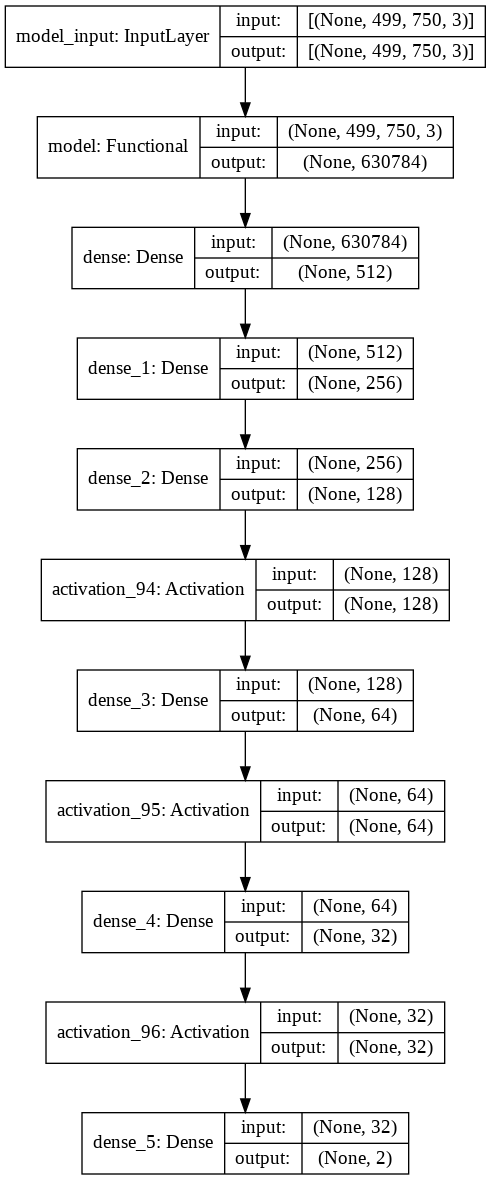

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)